# Luminaire Simulator

Simulate the path from light fixtures to the camera.

In [1]:
import cupy as cp
import viz_cuda
import results
import simulation
from pyinstrument import Profiler
from pyinstrument.renderers import ConsoleRenderer

import numpy as np
np.set_printoptions(precision=6, linewidth=200)

profiler = Profiler()

mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

results = results.LuminaireSimulationResult()
#simulator = simulation.Simulator(results, waves = 40, bundles = 10000000, bundle_size = 1)
#simulator = simulation.Simulator(results, waves = 80, bundles =  5000000, bundle_size = 1)
simulator = simulation.LuminaireSimulator(results, waves =  160, bundles =  500000, bundle_size = 1)

/home/joel/.local/lib/python3.10/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


mempool.used_bytes 6678528


/home/joel/.local/lib/python3.10/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [2]:
profiler.reset()
profiler.start()

#simulator.run()
simulator.run_all_waves()

session = profiler.stop()
profile_renderer = ConsoleRenderer(unicode=True, color=True, show_all=True)
print(profile_renderer.render(session))

  0%|          | 0/160 [00:00<?, ?it/s]

/home/joel/.local/lib/python3.10/site-packages/cupyx/jit/_compile.py:358: RuntimeWarning: Decorator staticmethod may not supported in JIT.
  warnings.warn(


# Done


  _     ._   __/__   _ _  _  _ _/_   Recorded: 10:10:42  Samples:  10701
 /_//_/// /_\ / //_// / //_'/ //     Duration: 25.513    CPU time: 25.640
/   _/                      v4.7.2

Profile at /tmp/ipykernel_52620/2543664500.py:2

25.512 <module>  ../../../tmp/ipykernel_52620/2543664500.py:1
└─ 25.512 LuminaireSimulator.run_all_waves  simulation.py:40
   ├─ 25.389 LuminaireSimulator.run  simulation.py:60
   │  ├─ 25.020 LuminaireSimulator.record_results  simulation.py:46
   │  │  ├─ 13.301 Photons.sample  optics_cuda.py:81
   │  │  │  ├─ 10.448 compress_dead  optics_cuda.py:67
   │  │  │  │  └─ 10.448 compress  cupy/_indexing/indexing.py:75
   │  │  │  │     ├─ 10.446 [self]  cupy/_indexing/indexing.py
   │  │  │  │     └─ 0.002 _compile_module_with_cache  cupy/cuda/compiler.py:459
   │  │  │  │        └─ 0.002 _compile_with_cache_cuda  cupy/cuda/compiler.py:490
   │  │  │  │           ├─ 0.001 Module.load  <built-in>
   │  │  │  │           └─ 0.001 [self]  cupy/cuda/compiler.py
   

In [3]:
print(cp.sum(results._source_stage._histogram_4d_count._hist))

79999984.0


# <center> Source

total photons: 5.60e+14
photon bundle count: 8.00e+07
photon total energy (J): 2.06e-04
photon total power (W): 2.06e-01
luminous flux (lm): 6.85e+01


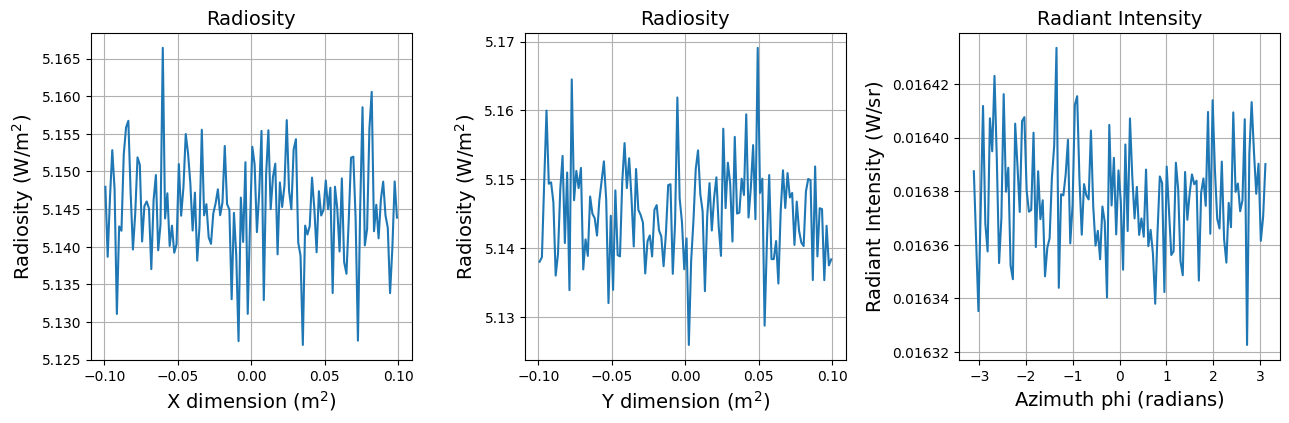

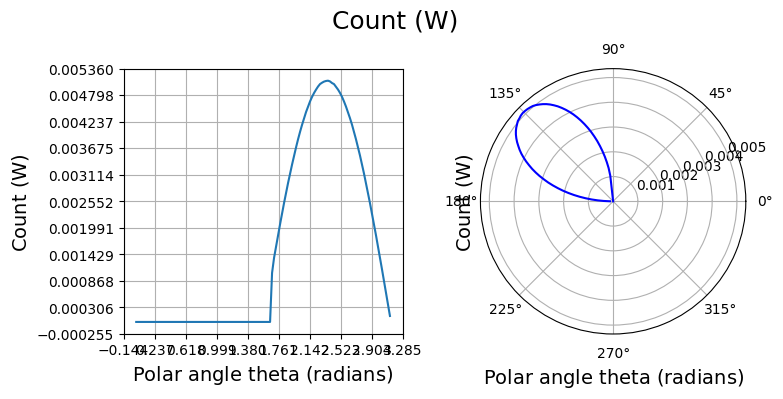

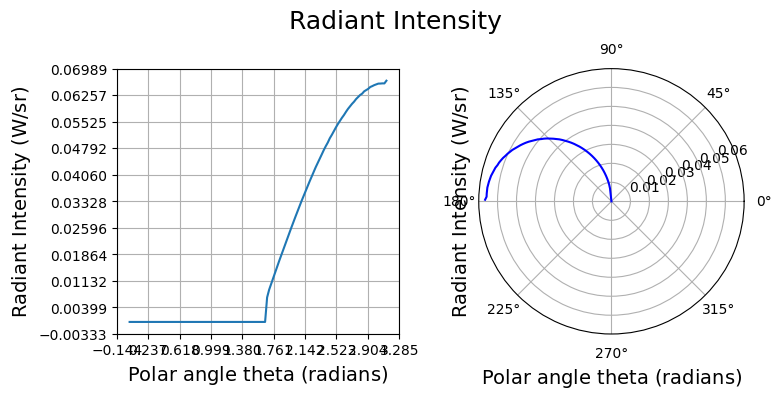

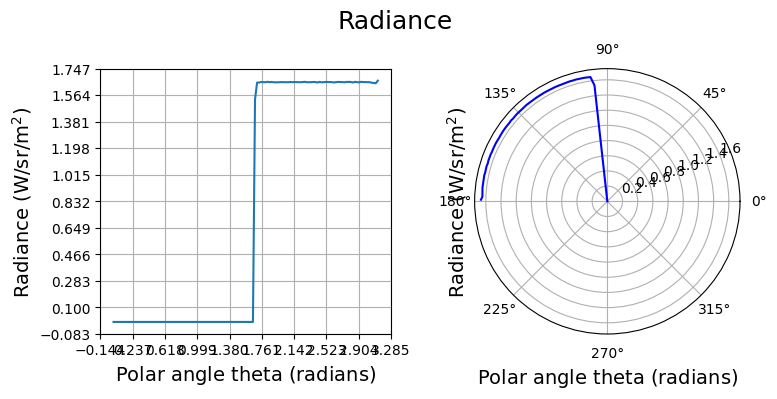

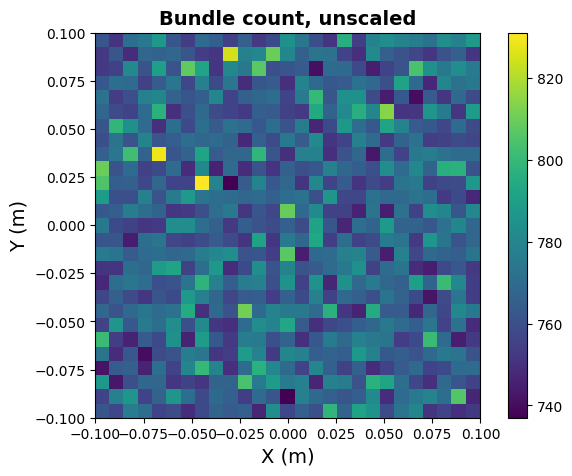

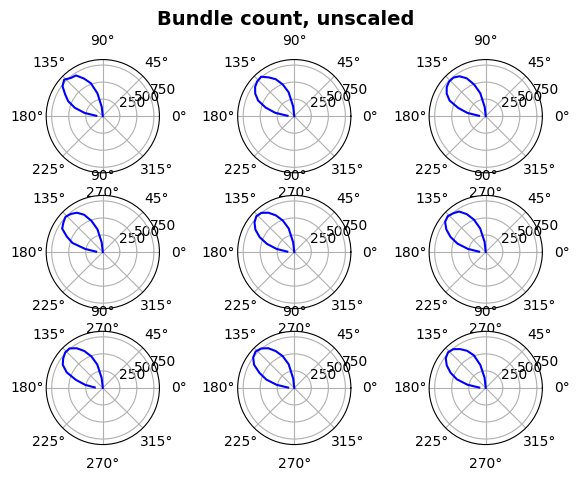

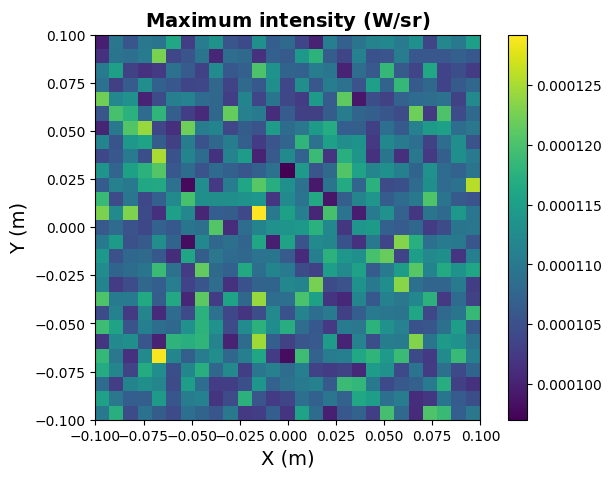

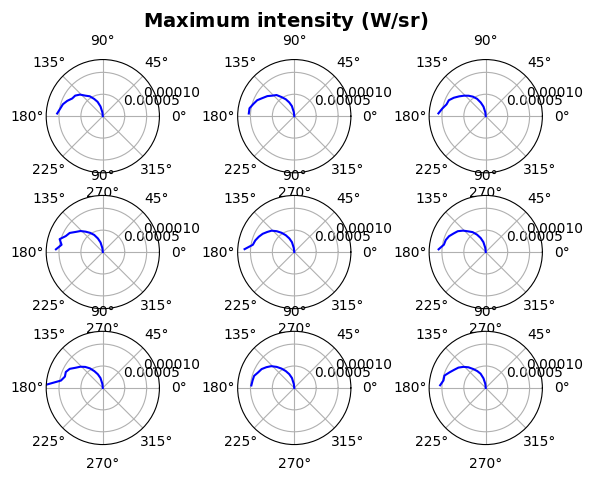

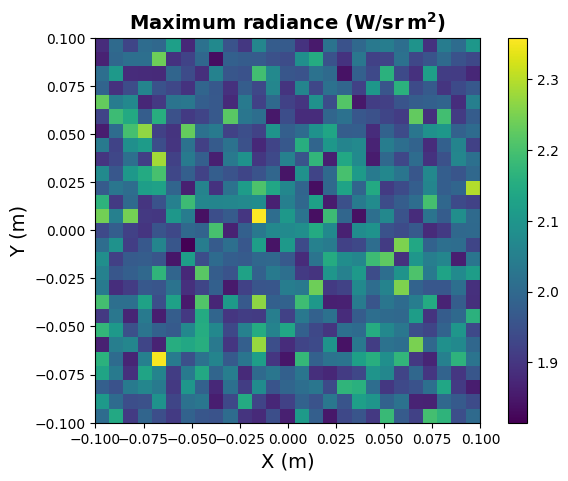

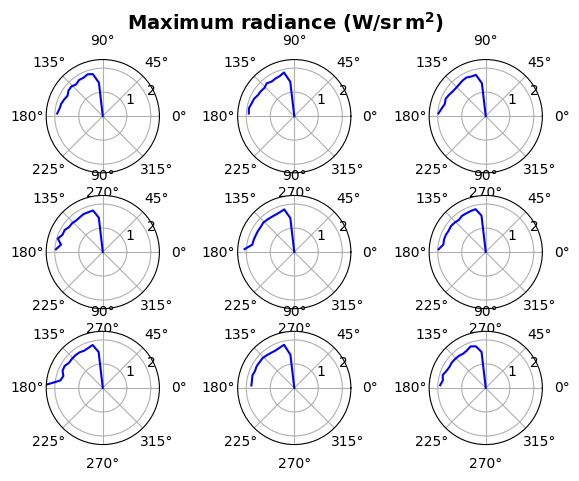

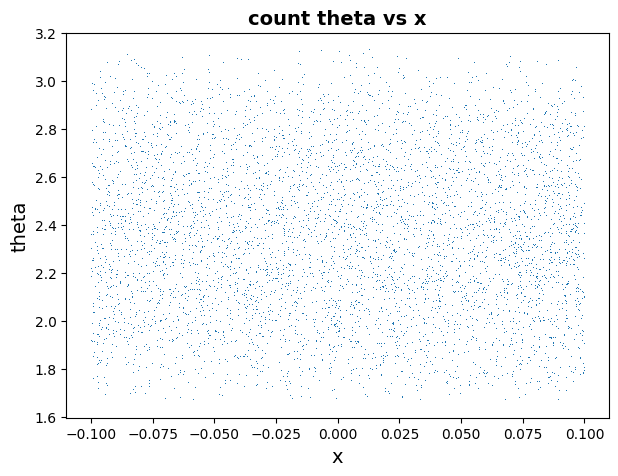

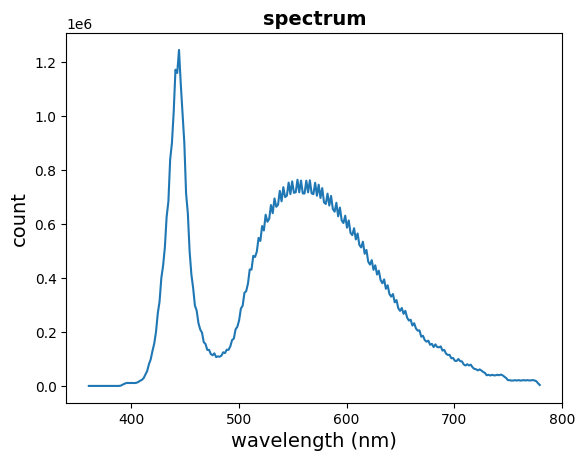

Output()

In [4]:
viz_cuda.summary(results._source_stage)
viz_cuda.plot_all_histograms(results._source_stage)
viz_cuda.plot_stages_3d([results._source_stage])

# <center> Camera Plane

total photons: 7.22e+10
photon bundle count: 1.03e+04
photon total energy (J): 2.65e-08
photon total power (W): 2.65e-05
luminous flux (lm): 8.91e-03


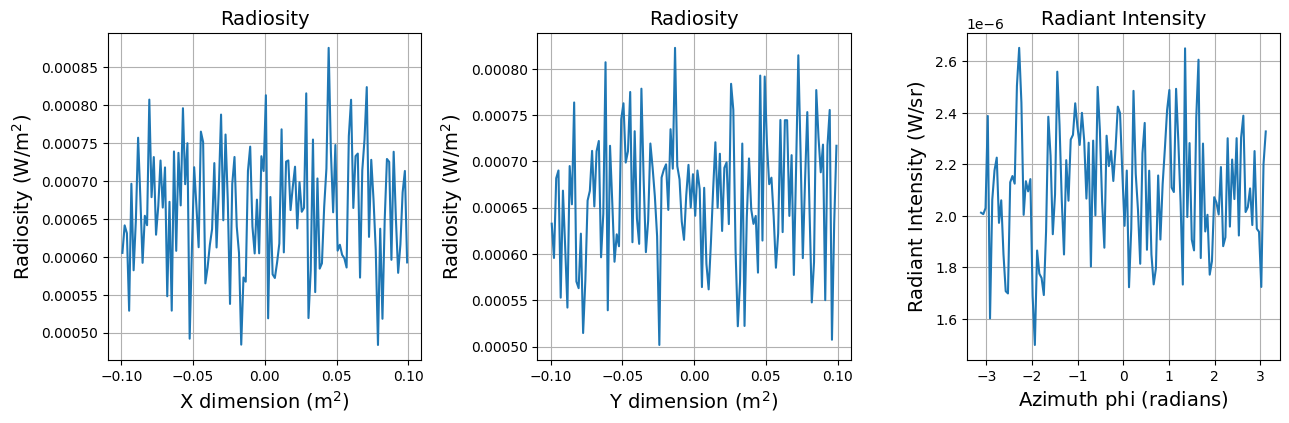

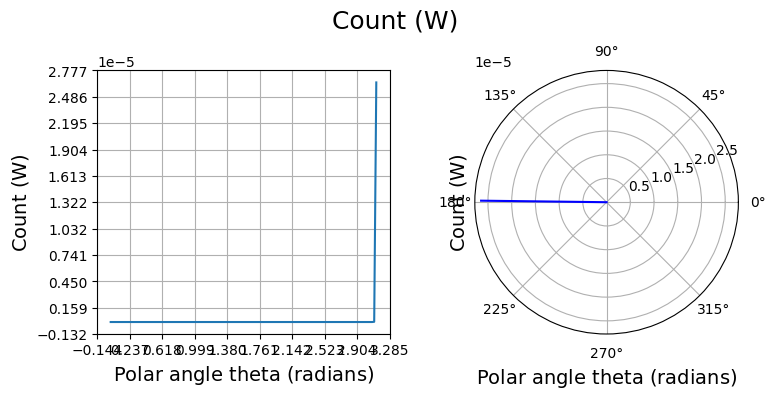

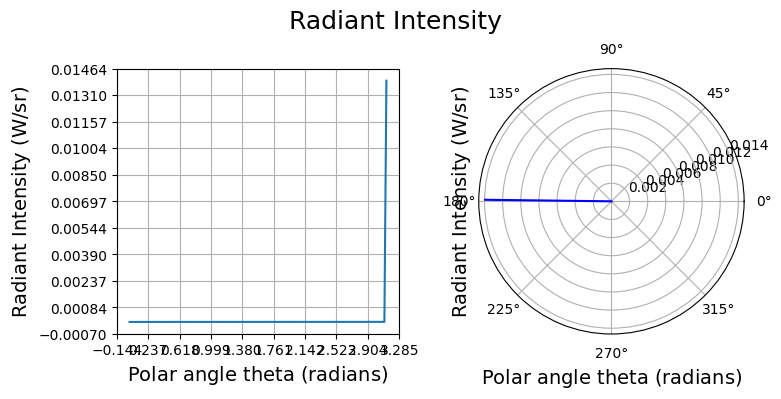

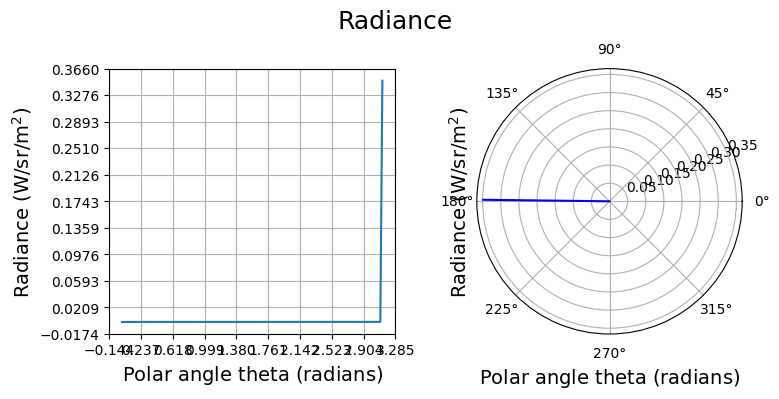

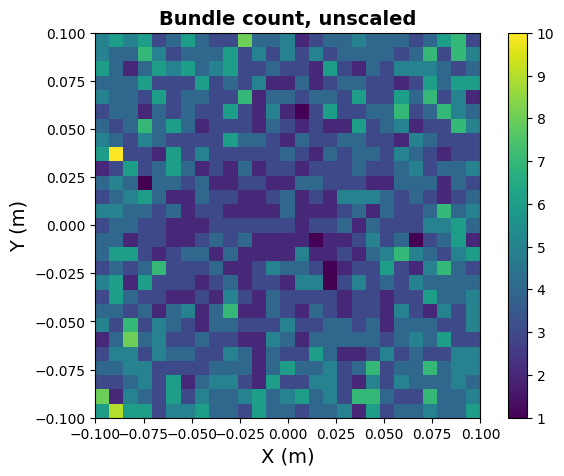

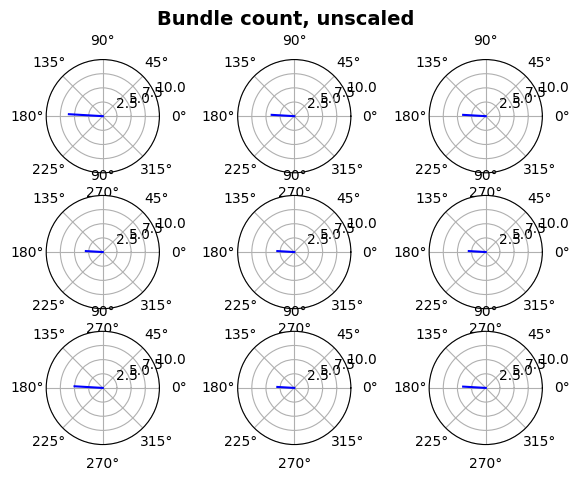

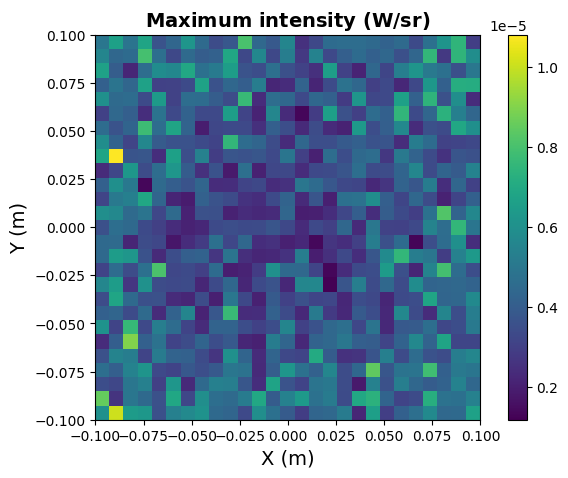

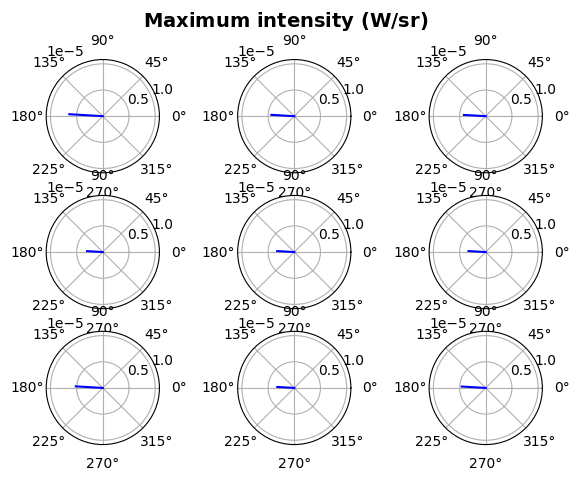

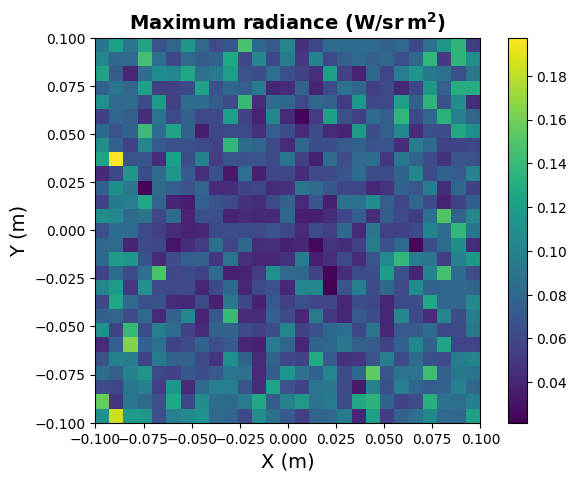

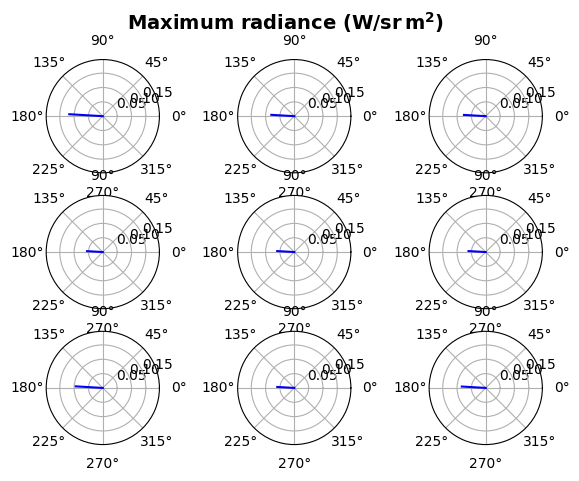

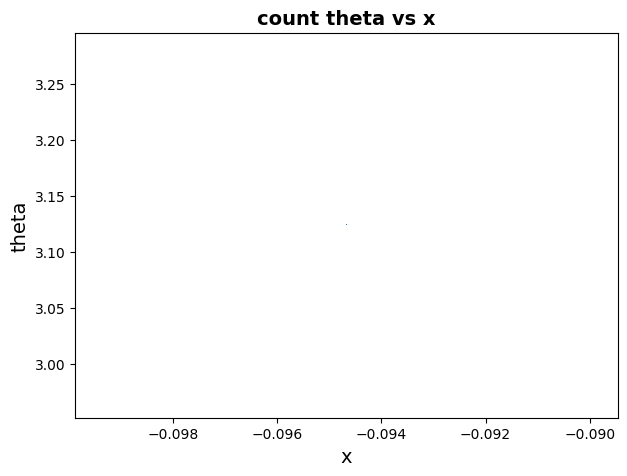

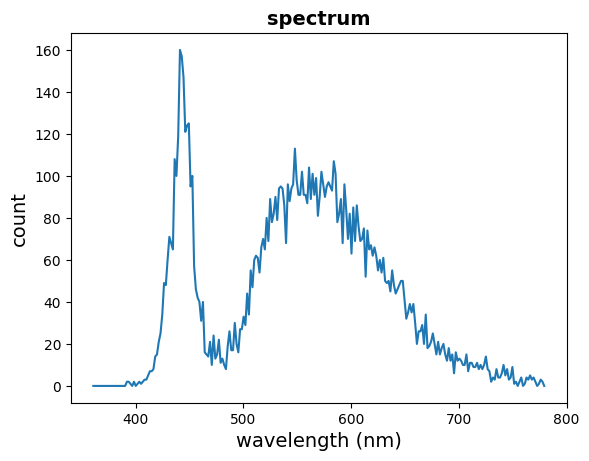

Output()

In [5]:
viz_cuda.summary(results._camera_plane_stage)
viz_cuda.plot_all_histograms(results._camera_plane_stage)
viz_cuda.plot_stages_3d([results._camera_plane_stage])

total photons: 7.10e+09
photon bundle count: 1.01e+03
photon total energy (J): 2.10e-09
photon total power (W): 2.10e-06
luminous flux (lm): 1.62e-04


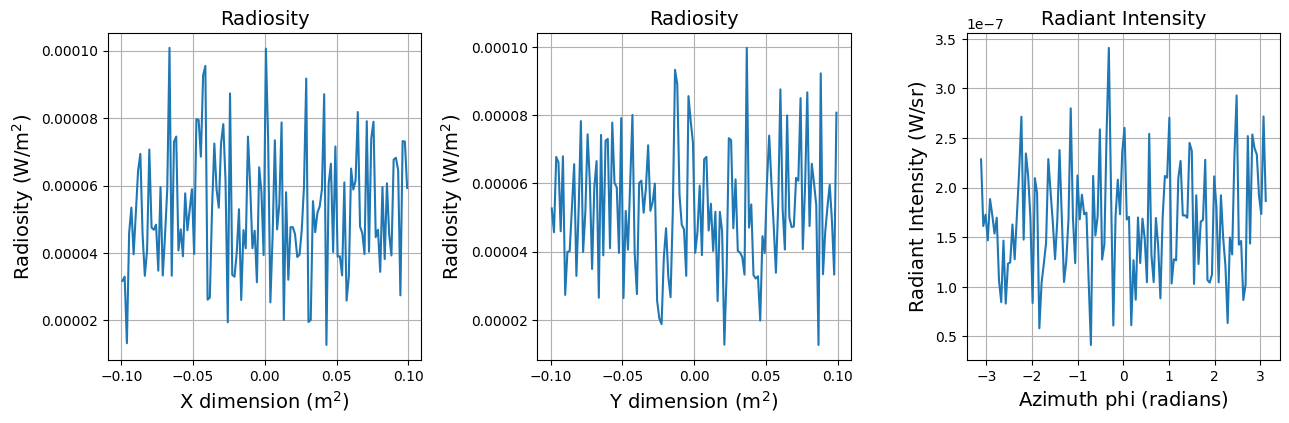

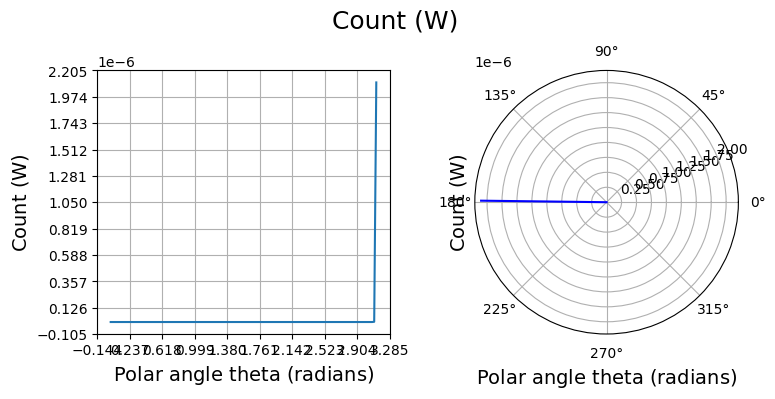

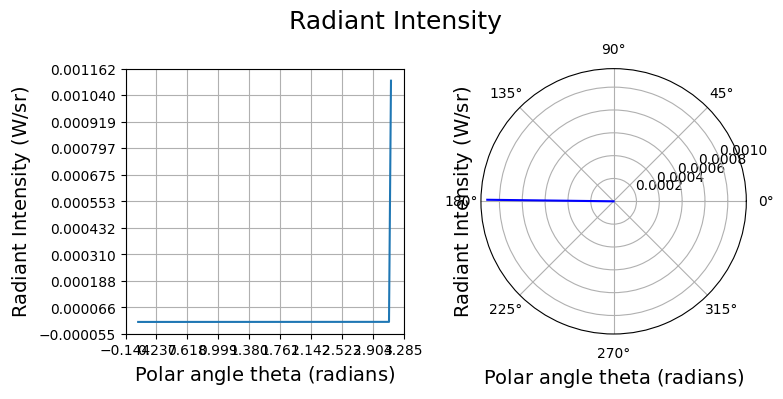

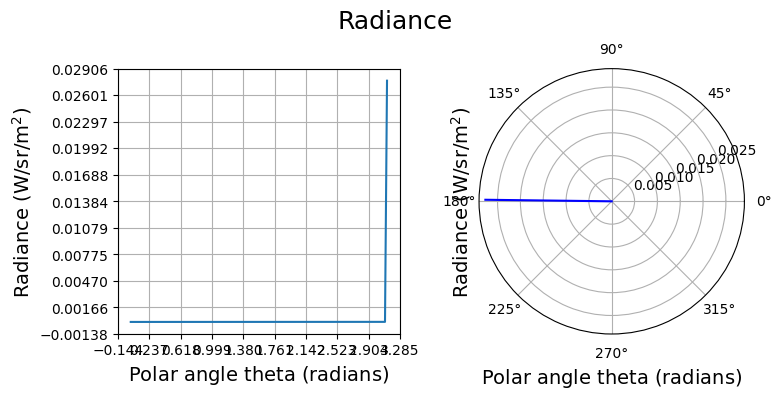

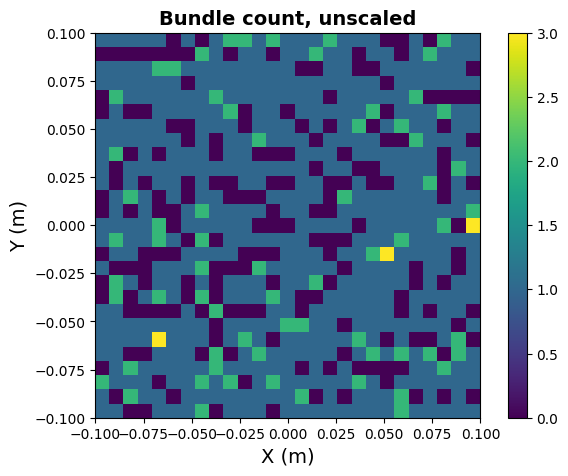

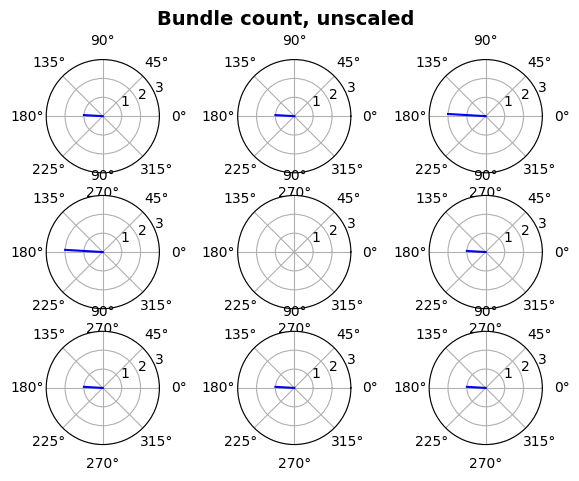

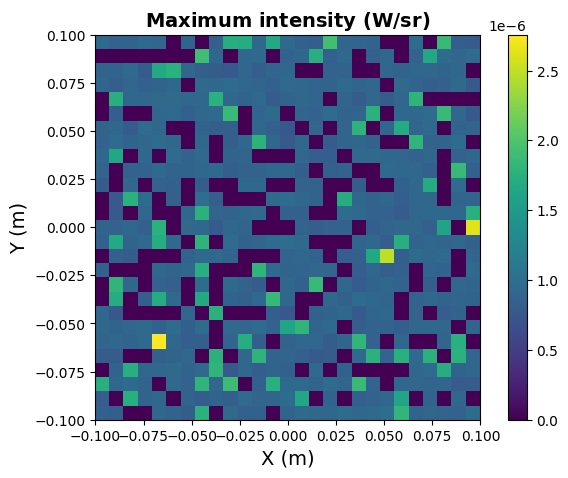

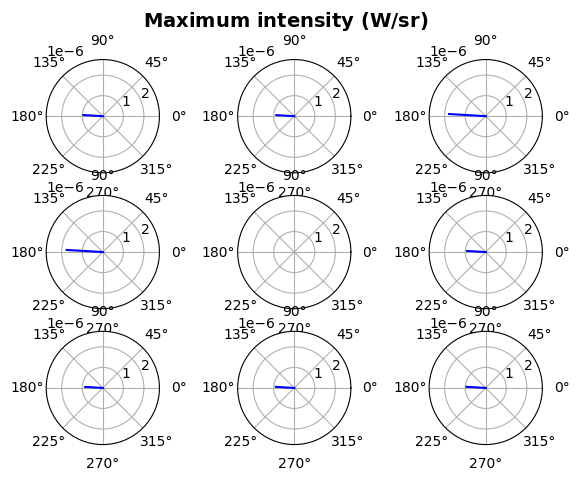

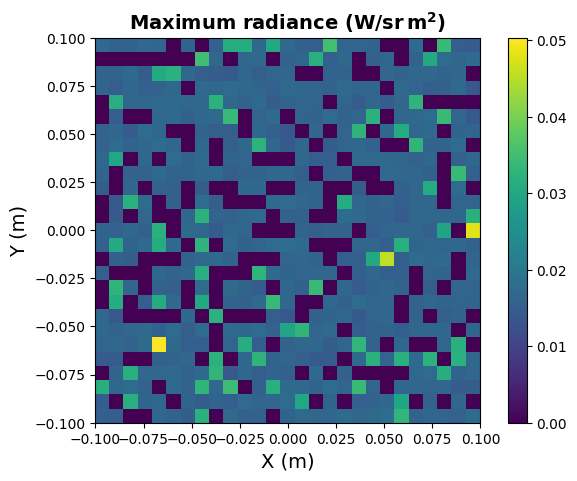

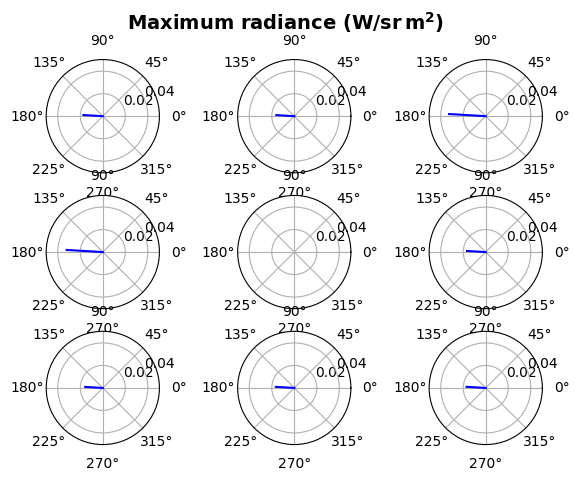

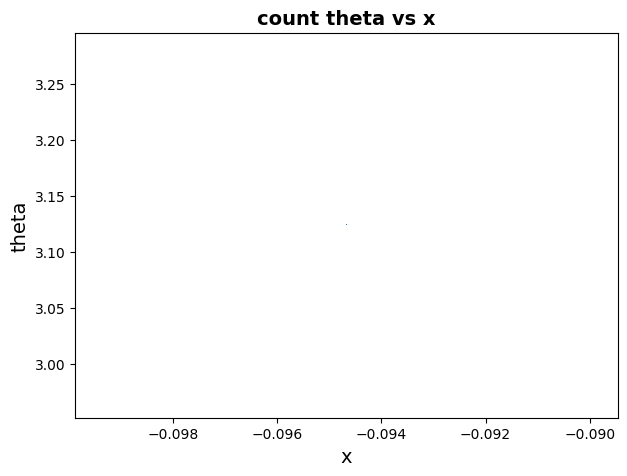

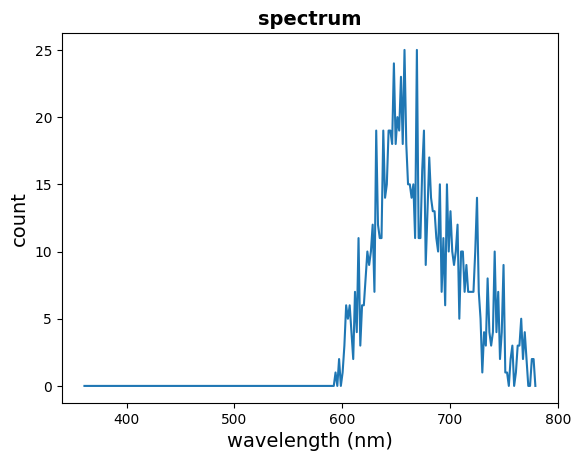

Output()

In [6]:
# after the filter
viz_cuda.summary(results._filter_stage)
viz_cuda.plot_all_histograms(results._filter_stage)
viz_cuda.plot_stages_3d([results._filter_stage])

total photons: 2.10e+07
photon bundle count: 3.00e+00
photon total energy (J): 6.40e-12
photon total power (W): 6.40e-09
luminous flux (lm): 1.08e-06


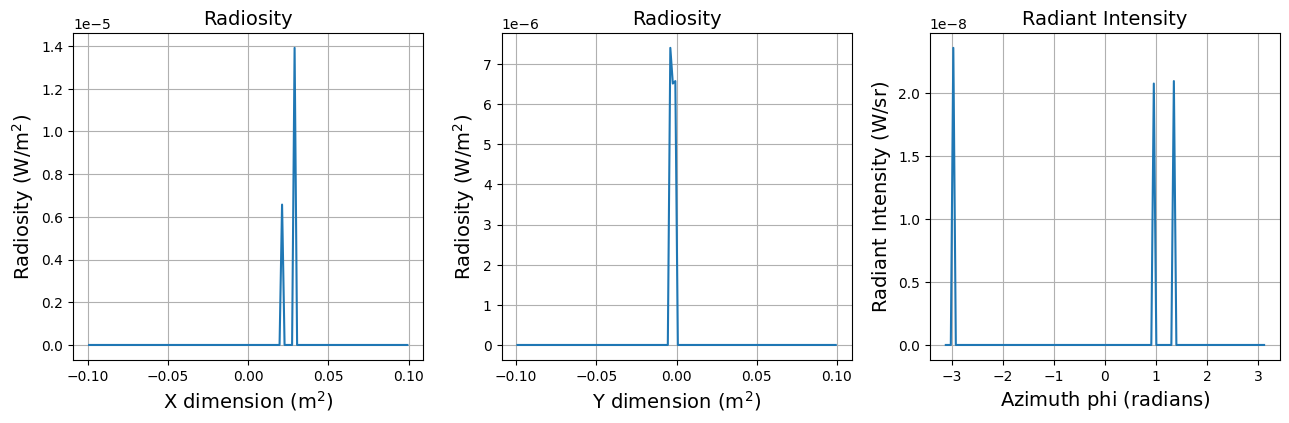

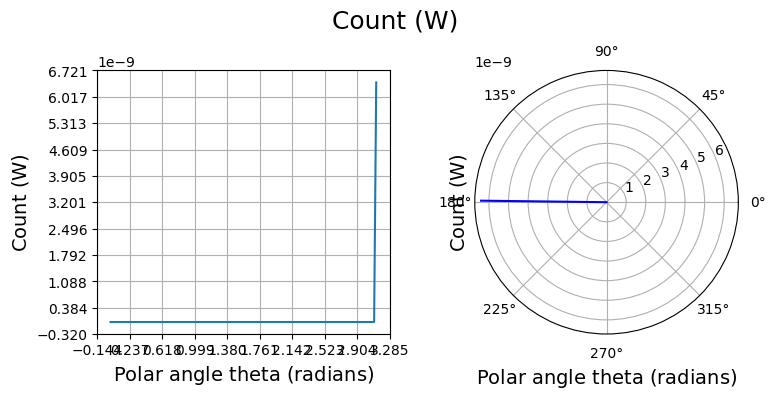

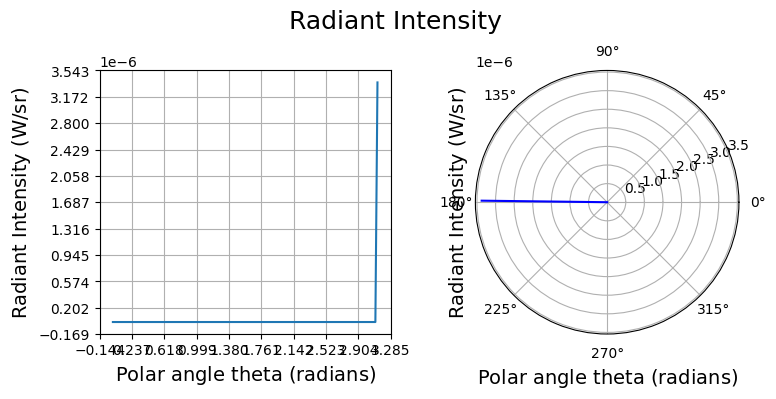

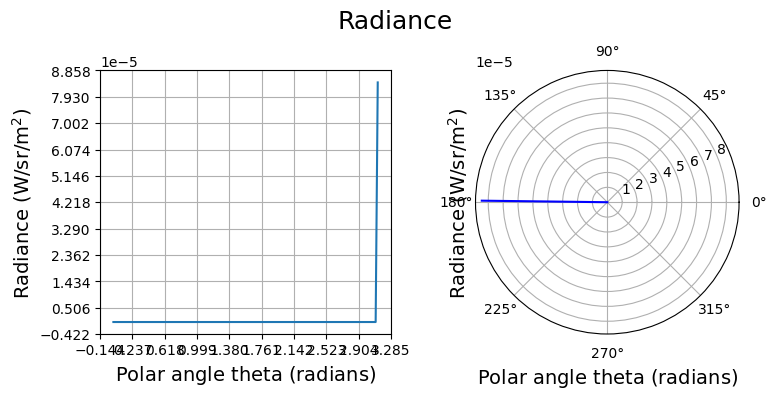

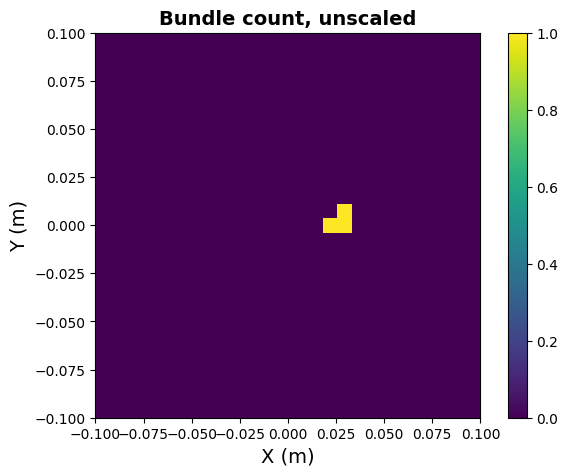

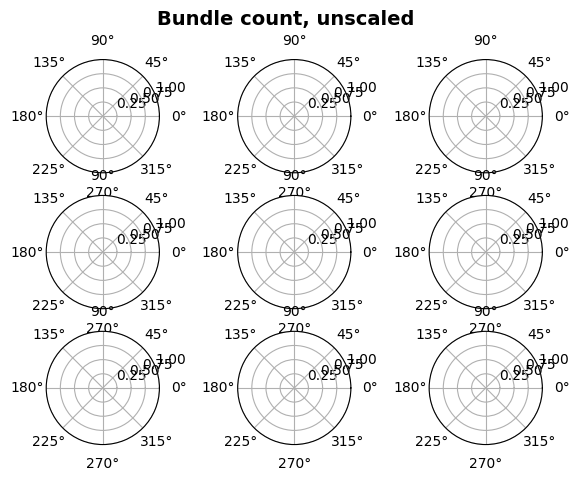

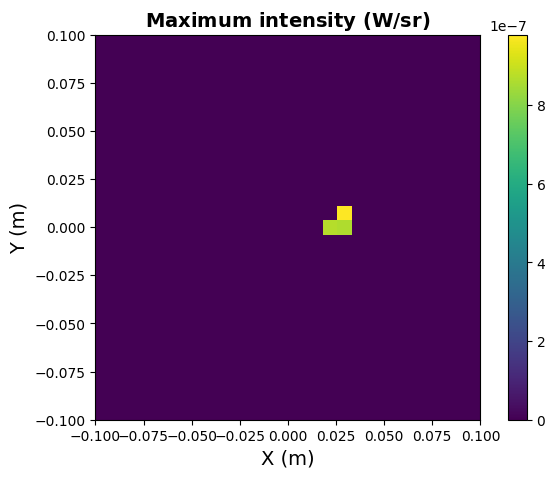

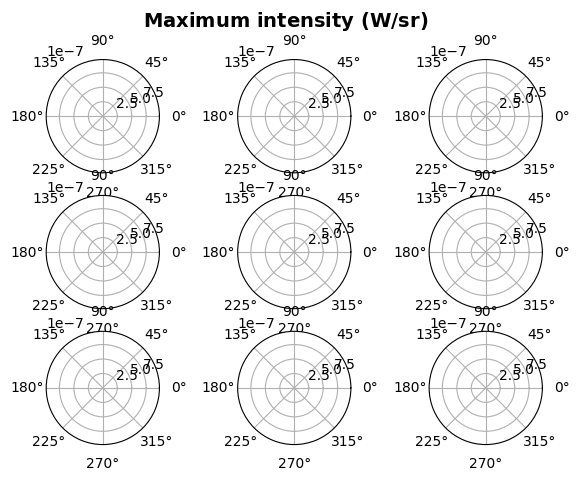

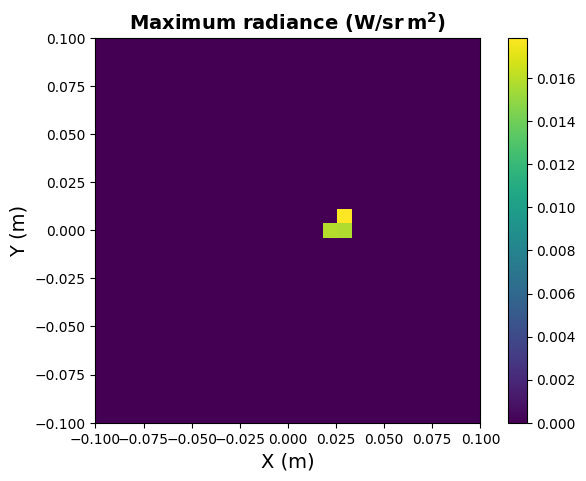

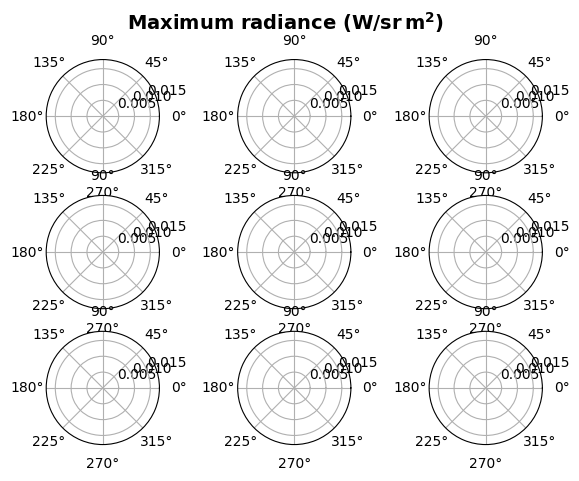

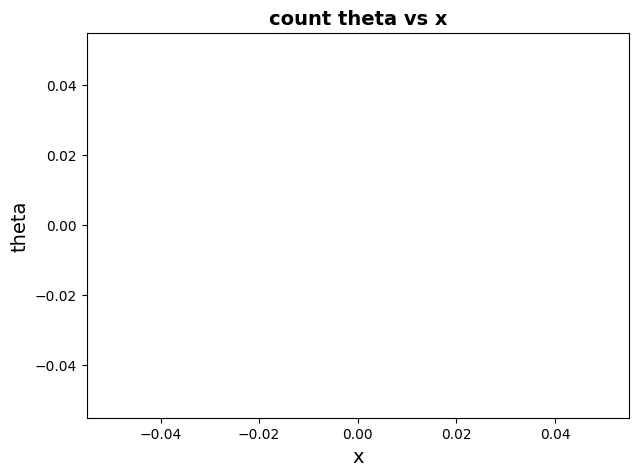

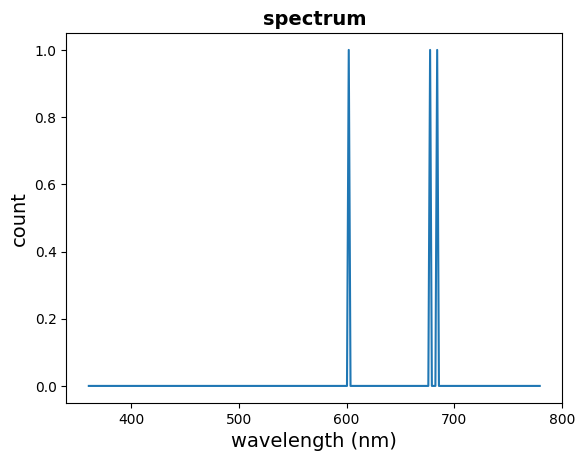

Output()

In [7]:
# same as the camera dimensions
viz_cuda.summary(results._camera_lens_stage)
viz_cuda.plot_all_histograms(results._camera_lens_stage)
viz_cuda.plot_stages_3d([results._camera_lens_stage])

In [8]:
viz_cuda.plot_stages_3d([results._source_stage, results._camera_plane_stage])

Output()

In [9]:
print(f"camera total {simulator._camera._total_electrons:.3e}")

camera total 2.100e+07
